In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.13.1'

In [16]:
tf.keras.__version__

AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

In [4]:
data = pd.read_csv("heart_attack_prediction_dataset (1).csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   sys0                             8763 non-null   int64  
 5   dys0                             8763 non-null   int64  
 6   sys1                             8763 non-null   int64  
 7   dys1                             8763 non-null   int64  
 8   sys2                             8763 non-null   int64  
 9   dys2                             8763 non-null   int64  
 10  sys3                             8763 non-null   int64  
 11  dys3                             8763 non-null   int64  
 12  Heart Rate          

In [ ]:
data.head()

In [ ]:
data.describe()

In [5]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'sys0', 'dys0', 'sys1',
       'dys1', 'sys2', 'dys2', 'sys3', 'dys3', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
# ctg_data = data[['Sex','Diet','Hemisphere']]
# data = pd.get_dummies(data = data, columns = ['Sex','Diet','Hemisphere'])
#data = pd.get_dummies(data, columns = ['Country','Continent','Hemisphere'])

In [6]:
sex_map = {'Male':1,'Female':0}
data['Sex']=data['Sex'].map(sex_map)
diet_map = {'Healthy':2,'Average':1,'Unhealthy':0}
data['Diet'] = data['Diet'].map(diet_map)
sphere_map = {'Southern Hemisphere':0,'Northern Hemisphere':1}
data["Hemisphere"] = data["Hemisphere"].map(sphere_map)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   int64  
 3   Cholesterol                      8763 non-null   int64  
 4   sys0                             8763 non-null   int64  
 5   dys0                             8763 non-null   int64  
 6   sys1                             8763 non-null   int64  
 7   dys1                             8763 non-null   int64  
 8   sys2                             8763 non-null   int64  
 9   dys2                             8763 non-null   int64  
 10  sys3                             8763 non-null   int64  
 11  dys3                             8763 non-null   int64  
 12  Heart Rate          

In [ ]:
# cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
# cat_columns = ['Sex_Female','Sex_Male']
#data[cat_columns] = data[cat_columns].astype(int)

In [8]:
# plt.figure(figsize=(8, 7))
# for i in ctg_data.columns:
#     ctg_num = ctg_data[i].value_counts()
#     chart = sns.barplot(x = ctg_num.index, y = ctg_num)
#     for p in chart.patches:
#         chart.annotate(format(p.get_height(), '.0f'), 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha = 'center', va = 'center', 
#                      xytext = (0, 10), 
#                      textcoords = 'offset points',
#                      fontsize=10)
        
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#     plt.show() 

In [ ]:
data.head()

<Axes: >

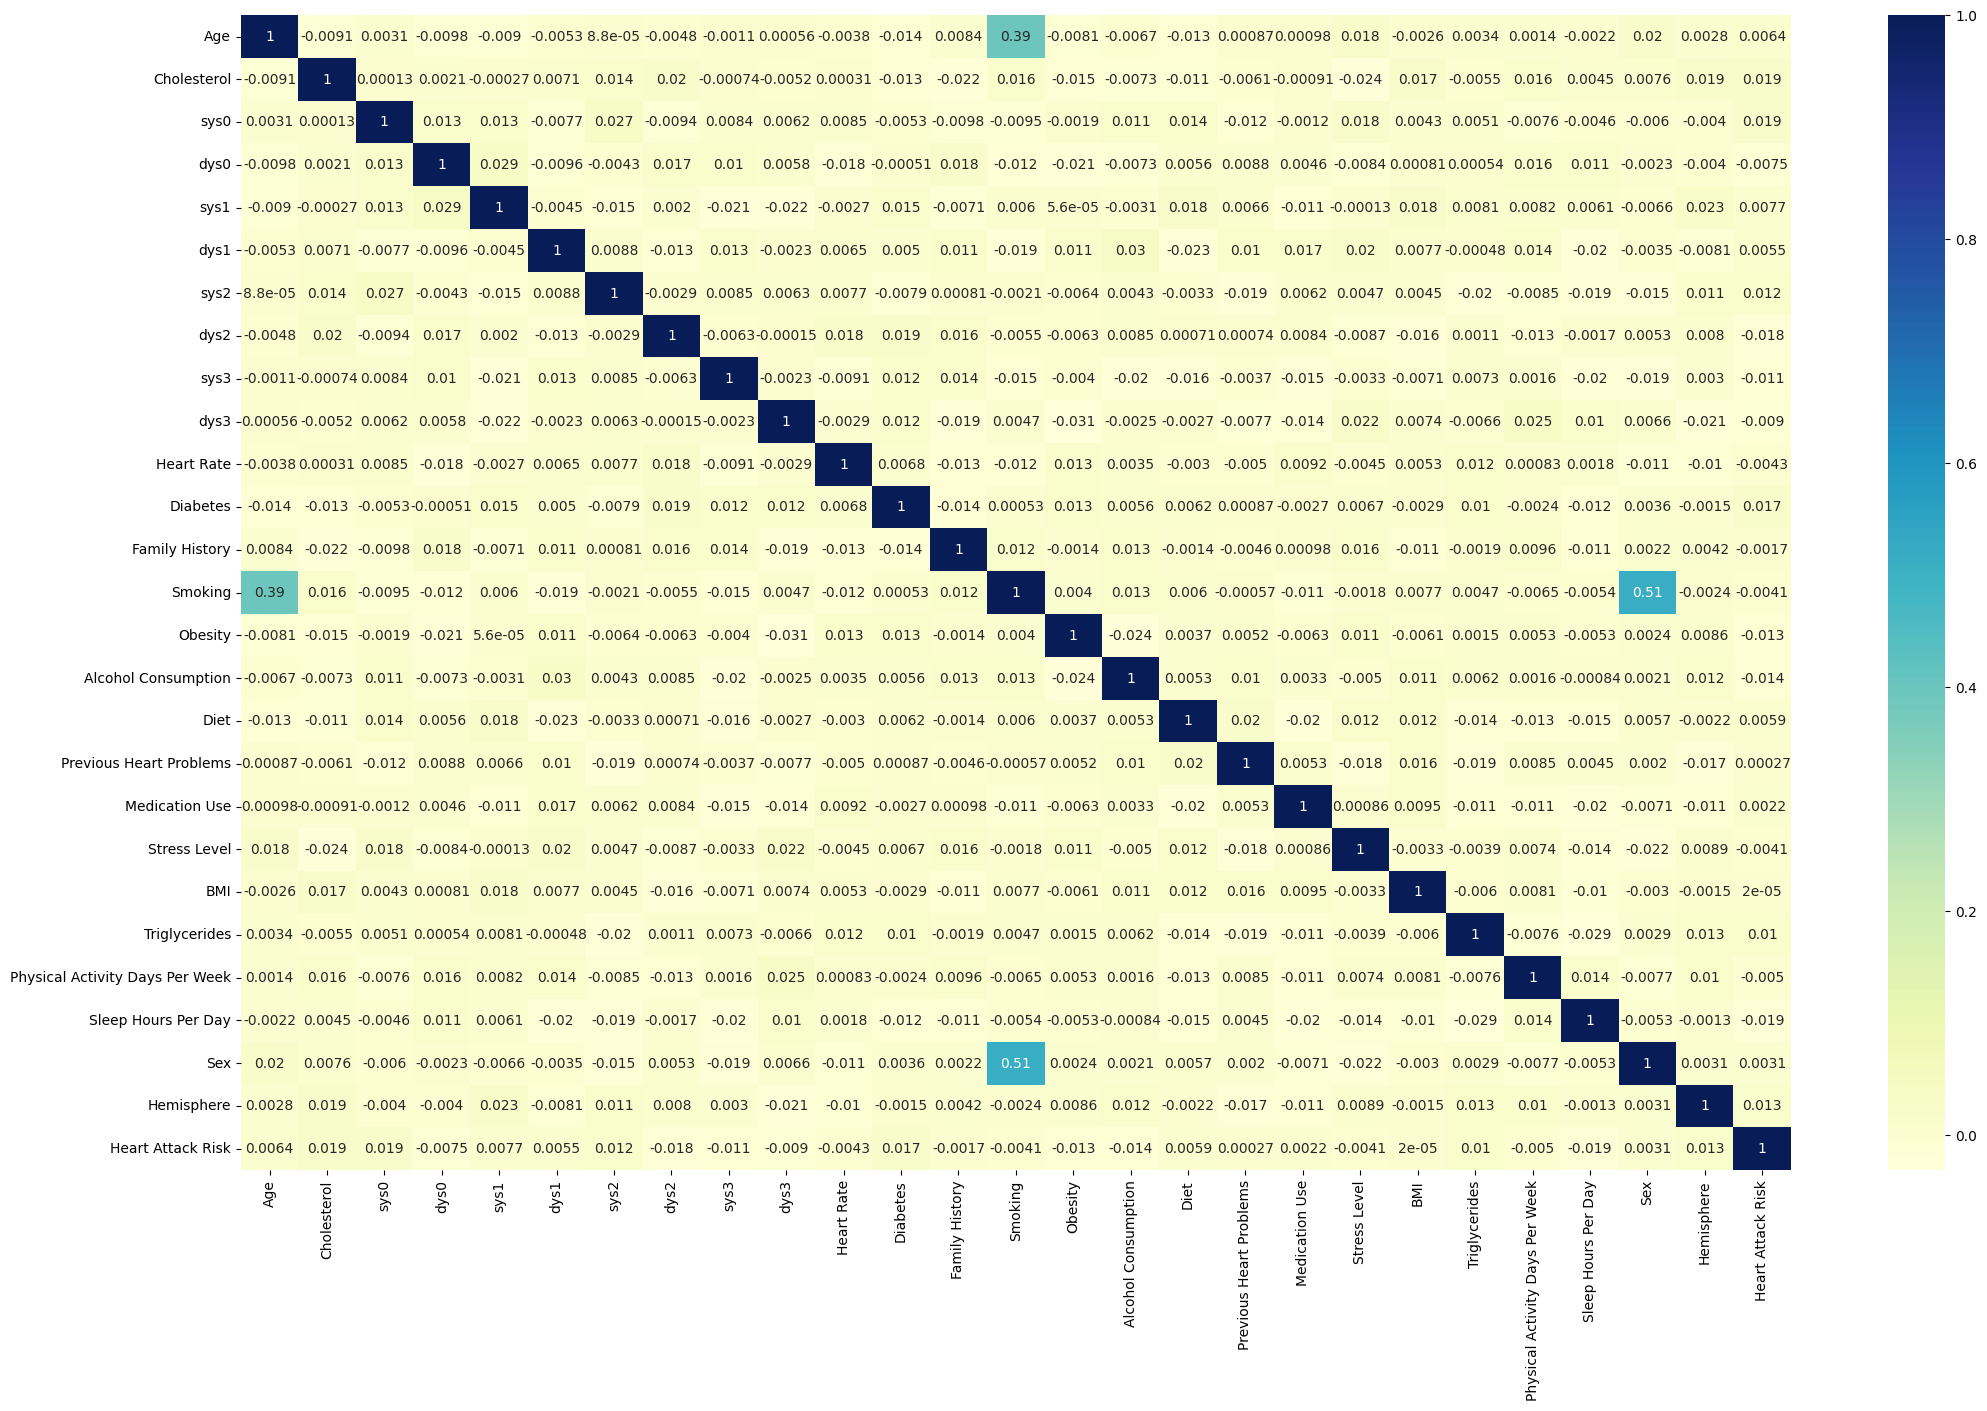

In [9]:
plt.figure(figsize = (25,15))
sns.heatmap(data[['Age', 'Cholesterol', 'sys0', 'dys0', 'sys1',
       'dys1', 'sys2', 'dys2', 'sys3', 'dys3', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Sex','Hemisphere','Heart Attack Risk']].corr(), 
       cmap="YlGnBu", annot=True)

In [11]:
# data.dtypes

In [19]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'sys0', 'dys0', 'sys1',
       'dys1', 'sys2', 'dys2', 'sys3', 'dys3', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [15]:
X = data [['Patient ID', 'Age', 'Sex', 'Cholesterol', 'sys0', 'dys0', 'sys1',
       'dys1', 'sys2', 'dys2', 'sys3', 'dys3', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Hemisphere']]
Y = data [['Heart Attack Risk']]
#X=X.dropna(how='any')
X.head(20)

,Patient ID,Age,Sex,Cholesterol,sys0,dys0,sys1,dys1,sys2,dys2,...,Alcohol Consumption,Diet,Previous Heart Problems,Medication Use,Stress Level,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere
0,BMW7812,67,1,208,158,88,140,112,135,90,...,0,1,0,0,9,31.251233,286,0,6,0
1,CZE1114,21,1,389,165,93,130,112,133,114,...,1,0,1,0,1,27.194973,235,1,7,1
2,BNI9906,21,0,324,174,99,134,115,133,112,...,0,2,1,1,9,28.176571,587,4,4,1
3,JLN3497,84,1,383,163,100,132,92,140,98,...,1,1,1,0,9,36.464704,378,3,4,1
4,GFO8847,66,1,318,91,88,140,93,134,116,...,0,0,1,0,6,21.809144,231,1,5,1
5,ZOO7941,54,0,297,172,86,139,119,130,115,...,1,0,1,1,2,20.146839,795,5,10,1
6,WYV0966,90,1,358,102,73,130,97,132,97,...,1,2,0,0,7,28.885811,284,4,10,1
7,XXM0972,84,1,220,131,68,135,120,131,117,...,1,1,0,1,4,22.221862,370,6,7,1
8,XCQ5937,20,1,145,144,105,133,90,135,107,...,0,1,0,0,5,35.809901,790,7,4,0
9,FTJ5456,43,0,248,160,70,131,112,132,93,...,1,0,0,0,4,22.558917,232,7,7,1


In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(27, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="softmax"))

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [23]:
history = model.fit(X, Y, epochs=30)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).